In [1]:
# GPU info
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [3]:
# install huggingface transformers
!pip -q install transformers

     |████████████████████████████████| 1.4MB 5.7MB/s 
     |████████████████████████████████| 890kB 17.2MB/s 
     |████████████████████████████████| 2.9MB 20.8MB/s 


In [4]:
import os

import numpy as np
import pandas as pd

import transformers

import matplotlib.pyplot as plt

import pickle

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
data = pd.read_csv("/content/drive/My Drive/Duplicate Question Detection/quora_questions.csv")
#data.fillna("none value", inplace=True) # replace nan value to none
# drop the rows with null value
data.dropna(axis=0, inplace=True)
N=len(data)
print('Number of question pairs: ', N)
data.head()

Number of question pairs:  404348


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [21]:
data.is_duplicate.value_counts()

0    255042
1    149306
Name: is_duplicate, dtype: int64

In [20]:
# maping
Q1 = np.array(data['question1'])
Q2 = np.array(data['question2'])
labels = np.array(data['is_duplicate'])

In [ ]:
for i in range 

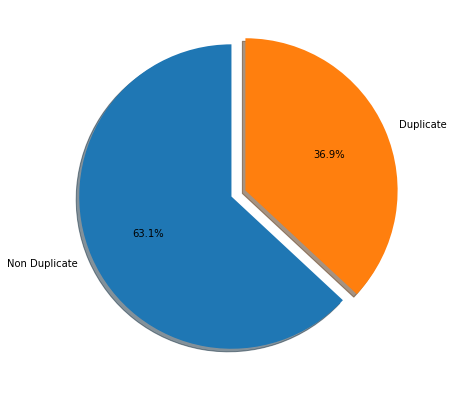

In [22]:
#values counts
counts = data.is_duplicate.value_counts()
# draw pie charts
plt.figure( figsize = (7, 7))
plt.pie([counts[0], counts[1]], labels=['Non Duplicate', 'Duplicate'], autopct='%1.1f%%', explode=(0, 0.1) ,shadow=True, startangle=90)
plt.show()

In [23]:
# import tokenizer
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [24]:
# maximum number of words in a question
Q1_words = np.empty_like(Q1)
Q2_words = np.empty_like(Q2)

for i in range(len(Q1)):
    Q1_words[i] = len(Q1[i].split())
    Q2_words[i] = len(Q2[i].split())

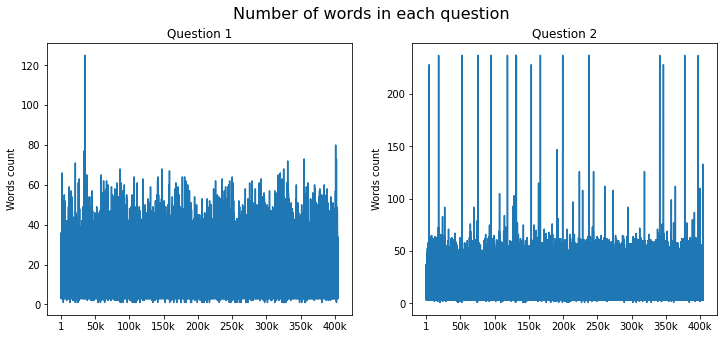

In [25]:
# draw plots
fig, axs = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Number of words in each question', fontsize=16)

x = [*range(len(Q2))]
axs[0].plot(x, Q1_words)
axs[0].set_xticklabels(['','1','50k','100k','150k', '200k', '250k', '300k', '350k','400k'])
axs[0].set_title('Question 1')
axs[0].set_ylabel('Words count')

axs[1].plot(x, Q2_words)
axs[1].set_xticklabels(['','1','50k','100k','150k', '200k', '250k', '300k', '350k','400k'])
axs[1].set_title('Question 2')
axs[1].set_ylabel('Words count')

plt.show()

In [26]:
# veiw maximum len of the question 1
Q1_tokens = np.empty_like(Q1)
Q2_tokens = np.empty_like(Q2)

for i in range(len(Q1)):
    Q1_tokens[i] = len(tokenizer.tokenize(Q1[i]))
    Q2_tokens[i] = len(tokenizer.tokenize(Q2[i]))

In [28]:
cnt = 0
for i in range(len(Q1_tokens)):
    if Q2_tokens[i] > 64:
        cnt += 1

print(cnt)

620


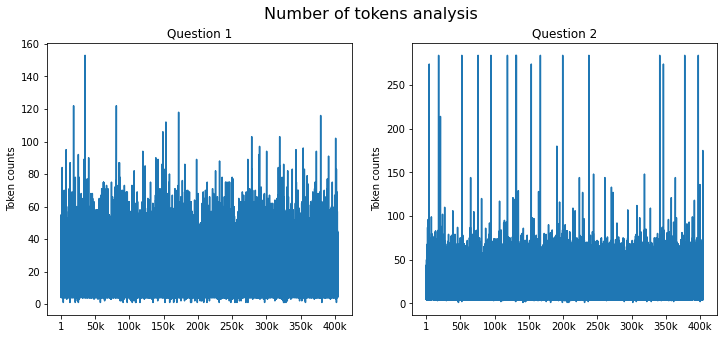

In [27]:
# draw plots
fig, axs = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Number of tokens analysis', fontsize=16)

x = [*range(len(Q2))]
axs[0].set_xticklabels(['','1','50k','100k','150k', '200k', '250k', '300k', '350k','400k'])
axs[0].plot(x, Q1_tokens)

axs[0].set_title('Question 1')
axs[0].set_ylabel('Token counts')

axs[1].set_xticklabels(['','1','50k','100k','150k', '200k', '250k', '300k', '350k','400k'])
axs[1].plot(x, Q2_tokens)
axs[1].set_title('Question 2')
axs[1].set_ylabel('Token counts')

plt.show()